# Fundamentos do desenvolvimento de modelos analíticos em Python

Ficha de trabalho Pandas

In [2]:
import pandas as pd

In [3]:
file_path = 'data/uber_reviews_without_reviewid.csv'
file_path_cleaned = 'data/uber_reviews_cleaned.csv'


df = pd.read_csv(file_path, index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, User_0 to User_11999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userImage             0 non-null      float64
 1   content               12000 non-null  object 
 2   score                 12000 non-null  int64  
 3   thumbsUpCount         12000 non-null  int64  
 4   reviewCreatedVersion  10260 non-null  object 
 5   at                    12000 non-null  object 
 6   replyContent          33 non-null     object 
 7   repliedAt             33 non-null     object 
 8   appVersion            10260 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 937.5+ KB


In [5]:
df.head()

,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
userName,,,,,,,,,
User_0,NaN,Good,5,0,4.556.10005,2024-12-18 17:17:19,NaN,NaN,4.556.10005
User_1,NaN,Nice,5,0,4.556.10005,2024-12-18 17:17:17,NaN,NaN,4.556.10005
User_2,NaN,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,NaN,NaN,4.532.10001
User_3,NaN,Good,4,0,4.556.10005,2024-12-18 17:08:27,NaN,NaN,4.556.10005
User_4,NaN,exllence,5,0,4.556.10005,2024-12-18 17:08:16,NaN,NaN,4.556.10005


# Limpeza de Dados

In [6]:
df_cleaned = df.drop(columns=['userImage'])

In [7]:
df_cleaned.fillna({'reviewCreatedVersion': 'Desconhecida'}, inplace=True)
df_cleaned.fillna({'appVersion': 'Desconhecida'}, inplace=True)

# Análise Descritiva

In [8]:
df_cleaned['score'].value_counts()

score
5    7926
1    2618
4     806
3     333
2     317
Name: count, dtype: int64

# Resumo de thumsUpCount

In [9]:
df_cleaned['thumbsUpCount'].describe()

count    12000.000000
mean         0.517000
std          6.298268
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        239.000000
Name: thumbsUpCount, dtype: float64

# Distribuição Temporal das Análises

In [10]:
df_cleaned['at'] = pd.to_datetime(df_cleaned['at'])
df_cleaned['at'].dt.date.value_counts().sort_index().head()

at
2024-11-24     55
2024-11-25    493
2024-11-26    537
2024-11-27    566
2024-11-28    461
Name: count, dtype: int64

# Resumo de Respostas

In [12]:
df_cleaned[['replyContent', 'repliedAt']].dropna().head()

,replyContent,repliedAt
userName,,
User_428,"Hi Robin, the feedback from our riders is vita...",2019-07-14 11:38:48
User_498,"Hi David, we want to take a closer look into t...",2019-01-29 12:09:57
User_668,"Hi Anibal, the feedback from our driver-partne...",2020-02-04 10:15:41
User_2819,"Hi Robert , we're extremely sorry to hear abou...",2022-01-17 10:39:55
User_2923,"HI Kiran, we want to take a closer look into t...",2019-05-29 15:34:45


# Correlação entre `score` e `thumbsUpCount`

In [13]:
df_cleaned[['score', 'thumbsUpCount']].corr()

,score,thumbsUpCount
score,1.000000,-0.104947
thumbsUpCount,-0.104947,1.000000


# Visualização

<Axes: title={'center': 'Distribuição de Avaliações (Score)'}, xlabel='Score', ylabel='Contagem'>

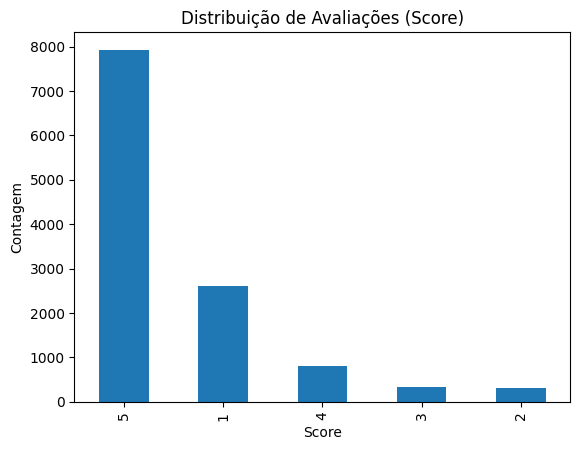

In [14]:
df_cleaned['score'].value_counts().plot(kind='bar', title='Distribuição de Avaliações (Score)', xlabel='Score', ylabel='Contagem')

# Exportação do FataFrame Limpo

In [15]:
df_cleaned.to_csv('data/uber_reviews_cleaned.csv', index=False)